In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import scipy as sp

In [3]:
import statsmodels.api as sm

In [4]:
train = pd.read_csv('train.csv')

In [5]:
test = pd.read_csv('test.csv')

# Introduction

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
train.isna().mean()*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [11]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [12]:
train['Loan_ID'].is_unique

True

In [13]:
train.drop(columns=['Loan_ID'], inplace=True)

In [14]:
train['Loan_Status'] = train['Loan_Status'].apply(lambda x : 1 if x=='Y' else 0)

In [24]:
continuous = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [16]:
categorical = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']

# Data Visualization

## histogram

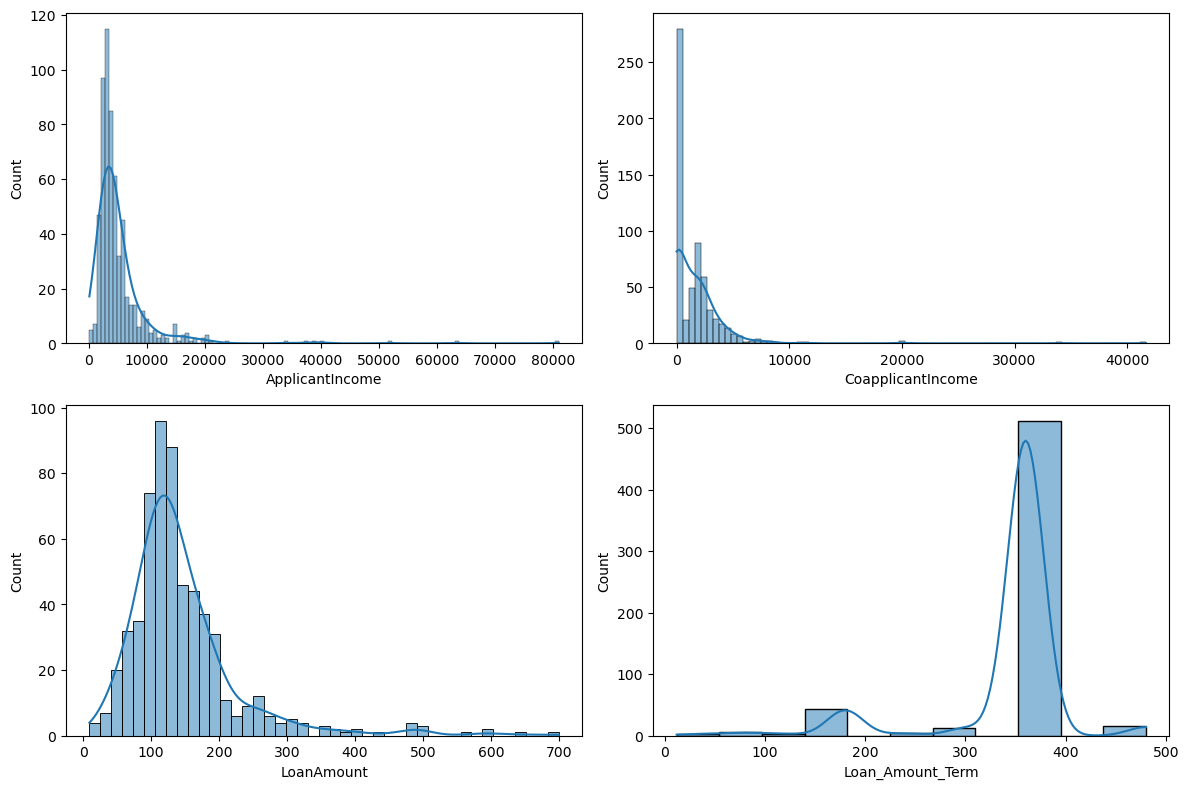

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(12,8))
for i, ax in enumerate(axes.ravel()):
    sns.histplot(x=train[continuous[i]], ax=ax, kde=True)
plt.tight_layout()

## boxplot

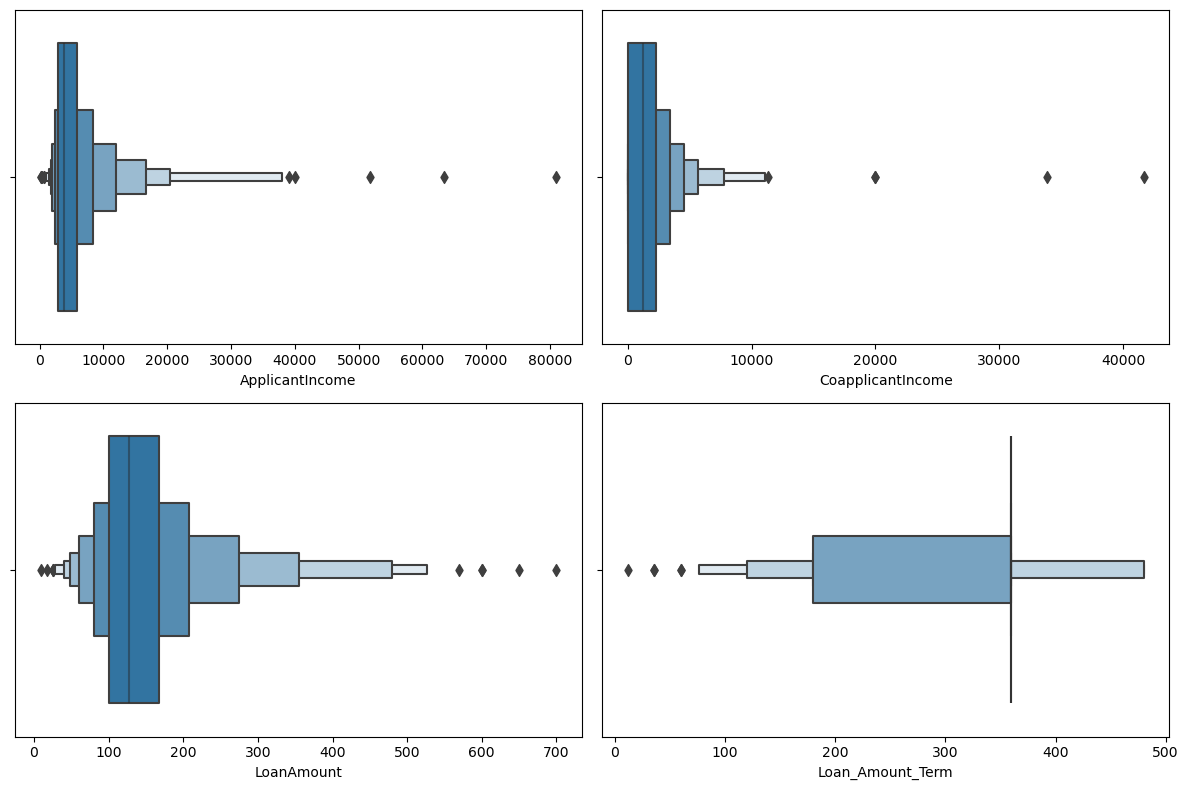

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(12,8))
for i, ax in enumerate(axes.ravel()):
    sns.boxenplot(x=train[continuous[i]], ax=ax)
plt.tight_layout()

## count plot

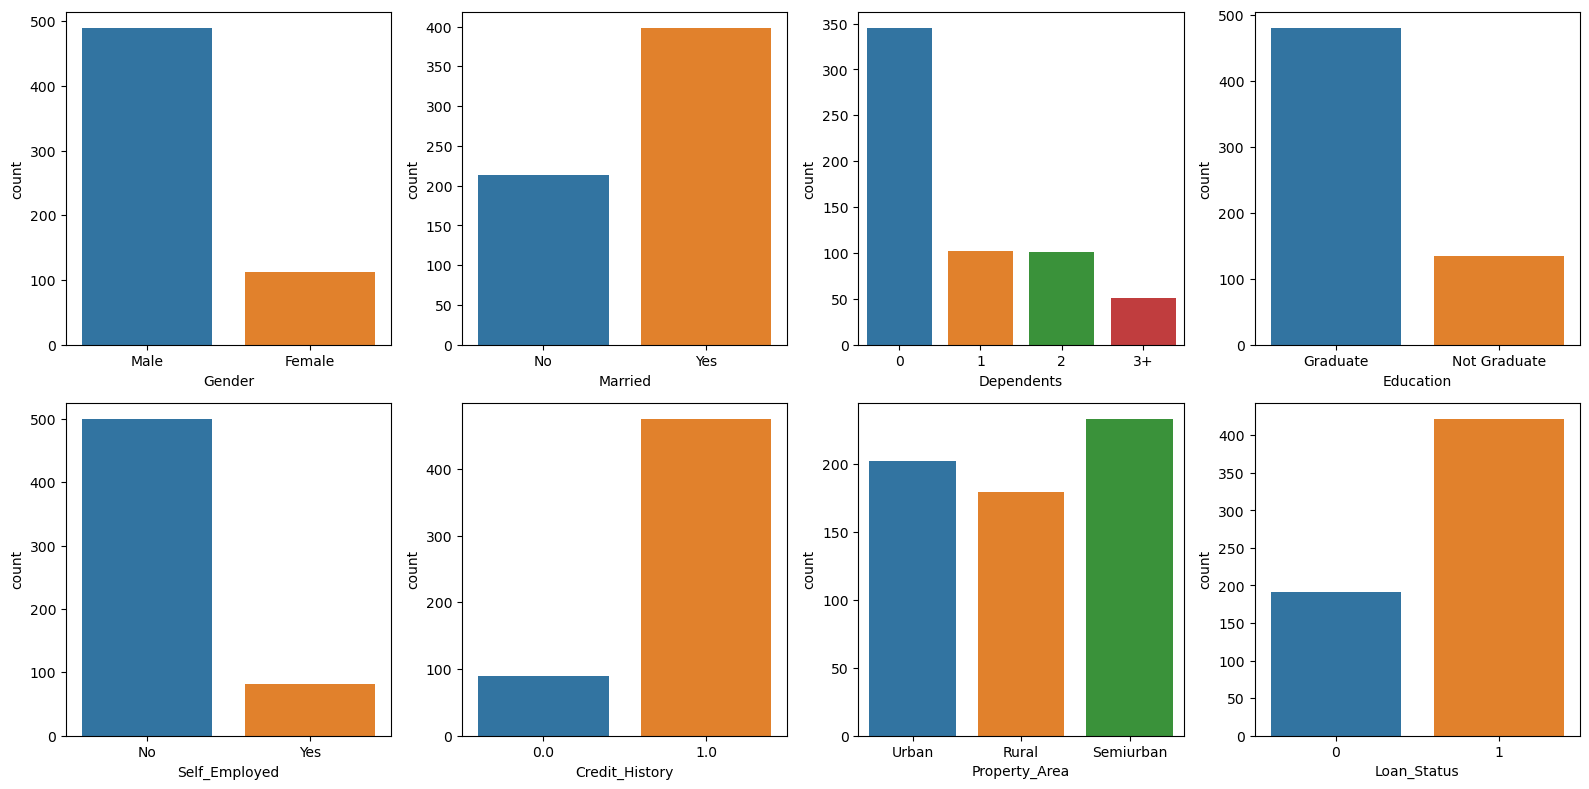

In [18]:
fig, axes = plt.subplots(2, 4, figsize=(16,8))
for i, ax in enumerate(axes.ravel()):
    sns.countplot(x=train[categorical[i]], ax=ax)
plt.tight_layout()

## bar plot

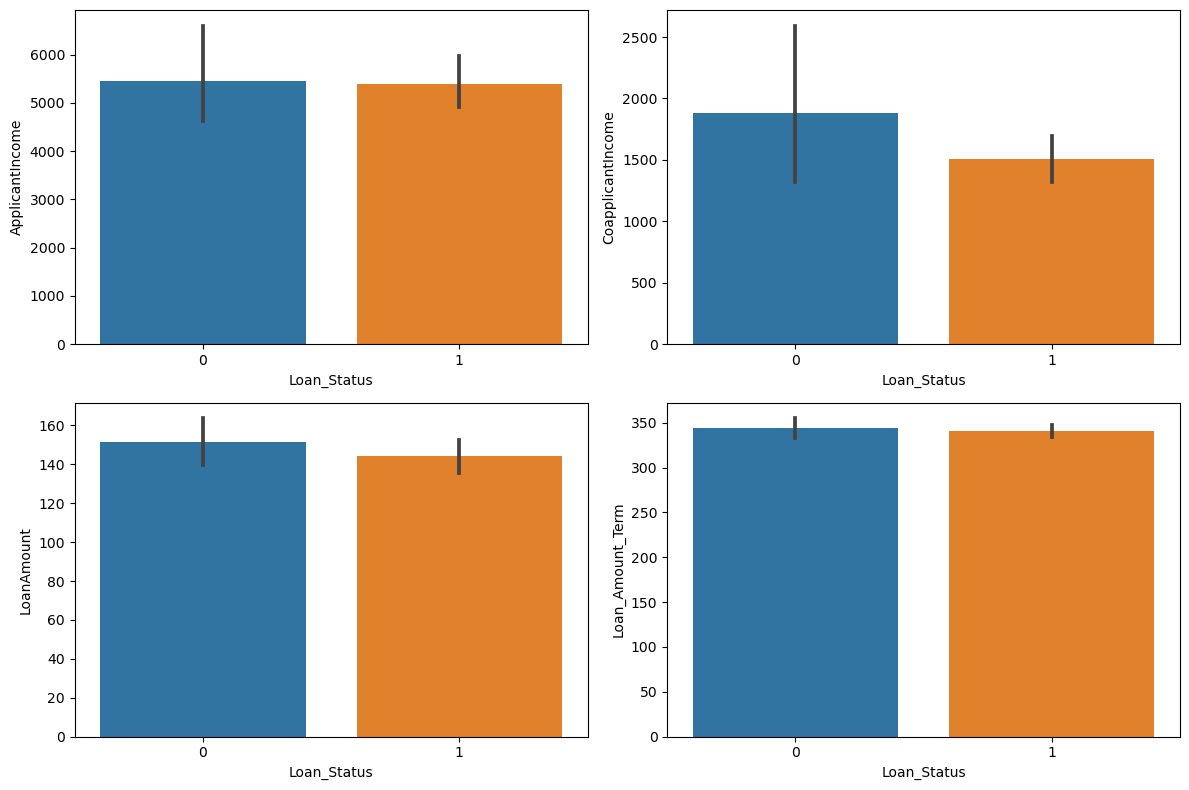

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(12,8))
for i, ax in enumerate(axes.ravel()):
    sns.barplot(y=train[continuous[i]], x=train['Loan_Status'], ax=ax)
plt.tight_layout()

## regplot

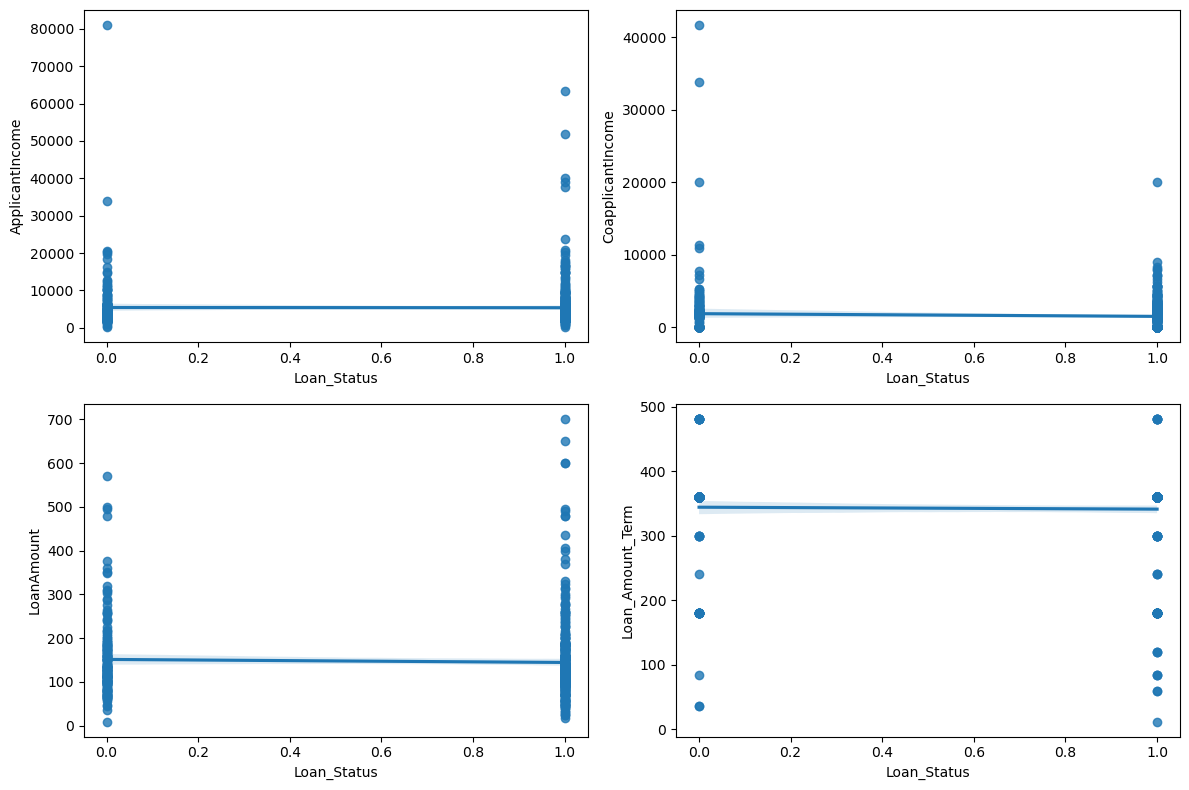

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(12,8))
for i, ax in enumerate(axes.ravel()):
    sns.regplot(y=train[continuous[i]], x=train['Loan_Status'], ax=ax)
plt.tight_layout()

## count plot with target variable

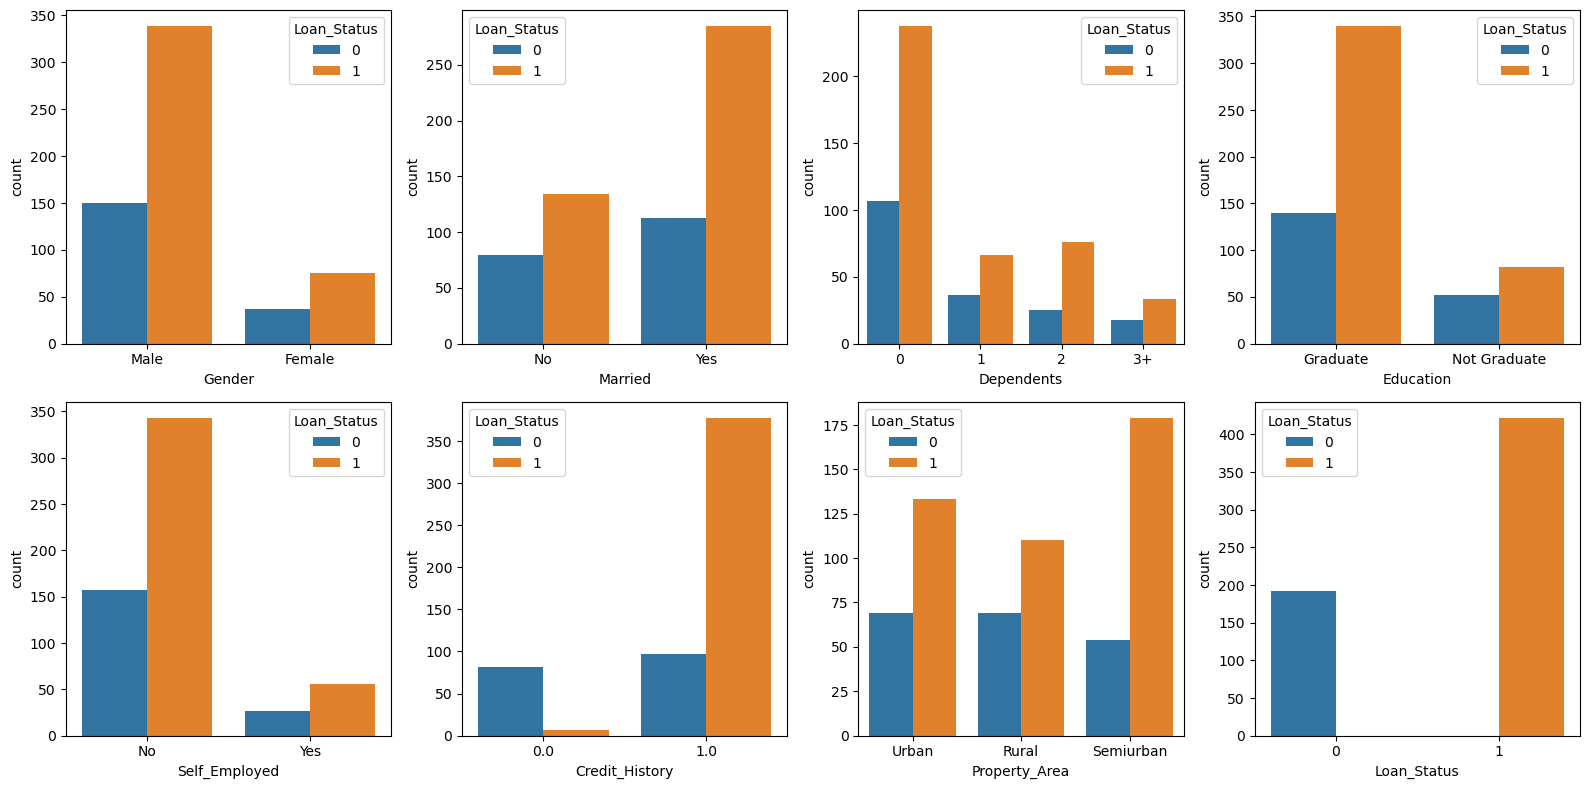

In [21]:
fig, axes = plt.subplots(2, 4, figsize=(16,8))
for i, ax in enumerate(axes.ravel()):
    sns.countplot(x=train[categorical[i]], hue=train['Loan_Status'], ax=ax)
plt.tight_layout()

## normalized plots

In [22]:
pd.crosstab(train['Loan_Status'], train['Gender'], normalize=True, margins=True)

Gender,Female,Male,All
Loan_Status,,,
0,0.061564,0.249584,0.311148
1,0.124792,0.564060,0.688852
All,0.186356,0.813644,1.000000


<AxesSubplot:xlabel='Loan_Status'>

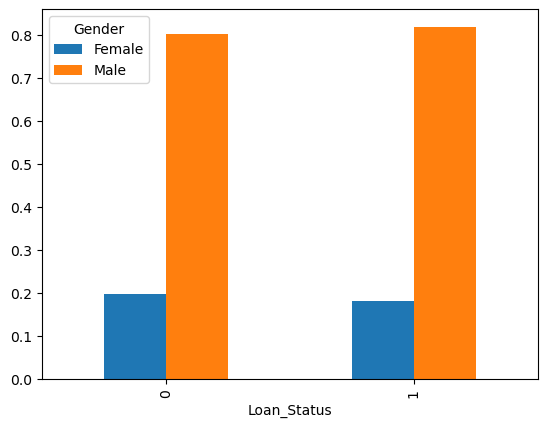

In [23]:
pd.crosstab(train['Loan_Status'], train['Gender'], normalize='index', margins=False).plot.bar()

<AxesSubplot:xlabel='Loan_Status'>

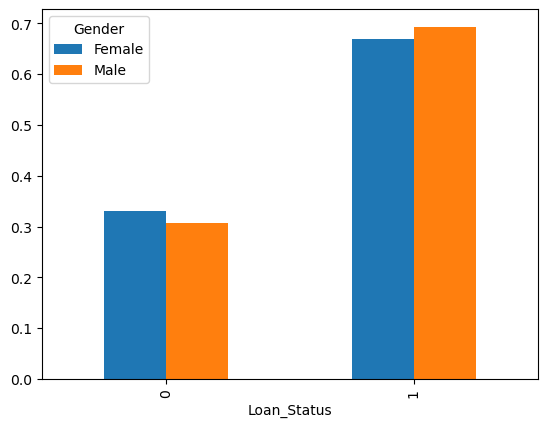

In [24]:
pd.crosstab(train['Loan_Status'], train['Gender'], normalize='columns').plot.bar()

<AxesSubplot:xlabel='Gender'>

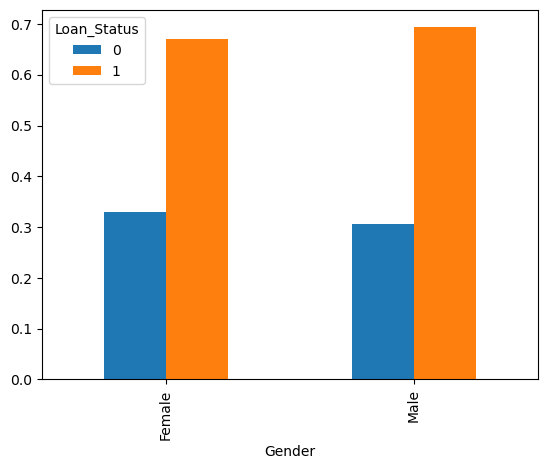

In [25]:
pd.crosstab(train['Gender'], train['Loan_Status'], normalize='index').plot.bar()

<AxesSubplot:xlabel='Gender'>

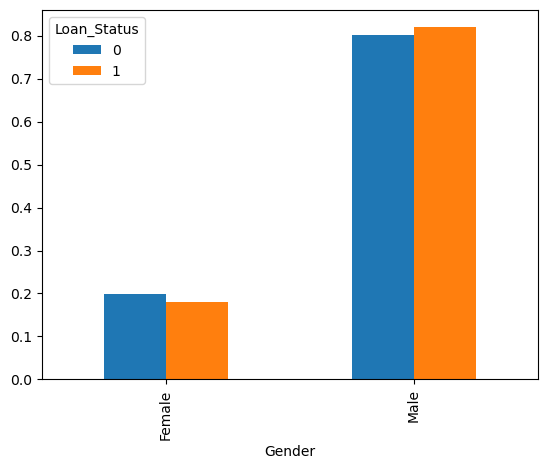

In [26]:
pd.crosstab(train['Gender'], train['Loan_Status'], normalize='columns').plot.bar()

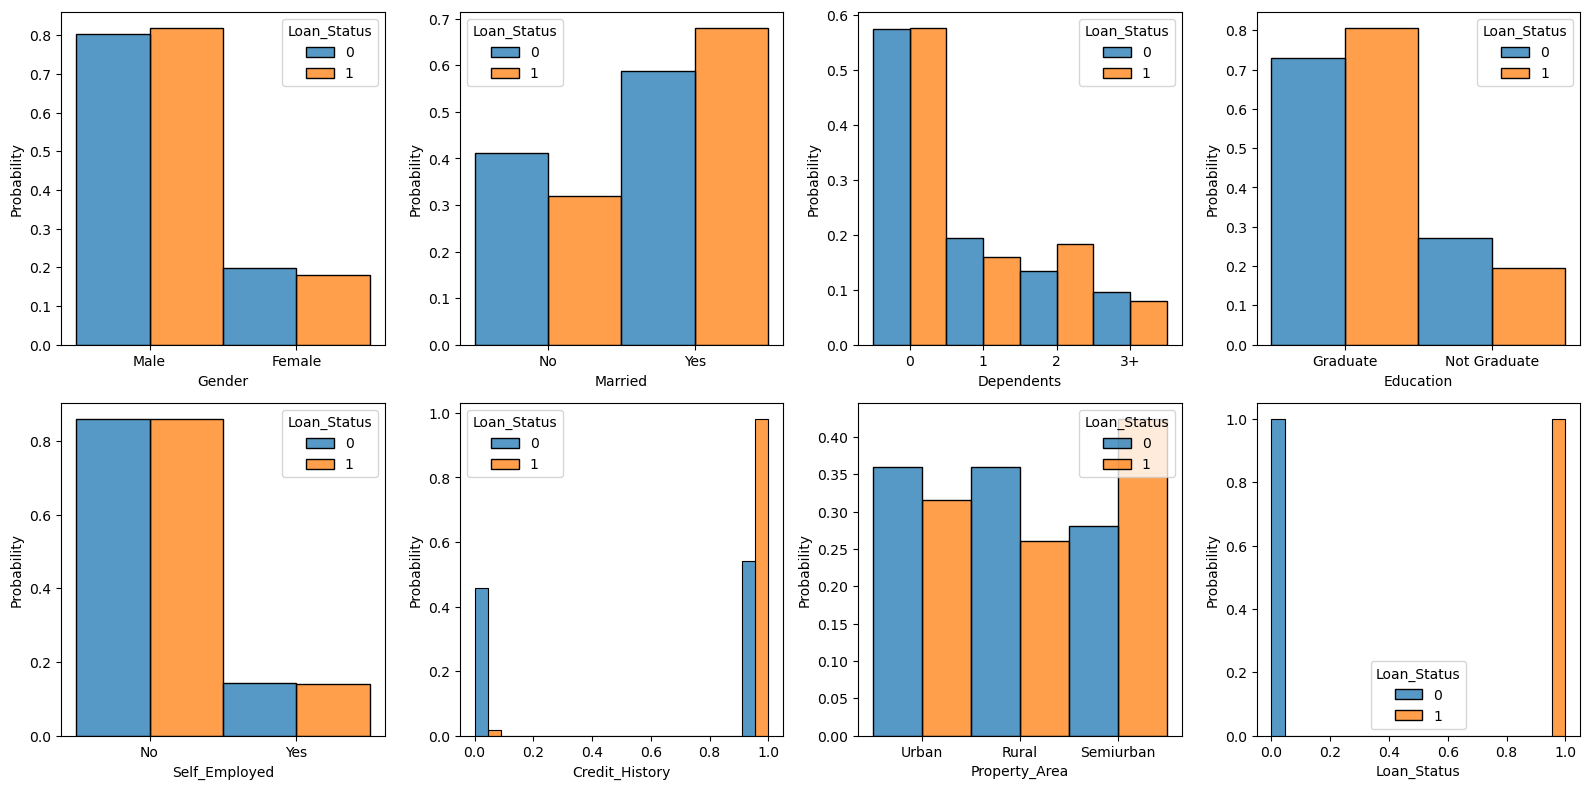

In [27]:
fig, axes = plt.subplots(2, 4, figsize=(16,8))
for i, ax in enumerate(axes.ravel()):
    sns.histplot(x=train[categorical[i]], hue=train['Loan_Status'], multiple='dodge', stat='probability', common_norm=False, ax=ax)
plt.tight_layout()

In the above plots, compare the bars in each category to know the association between category and label class.

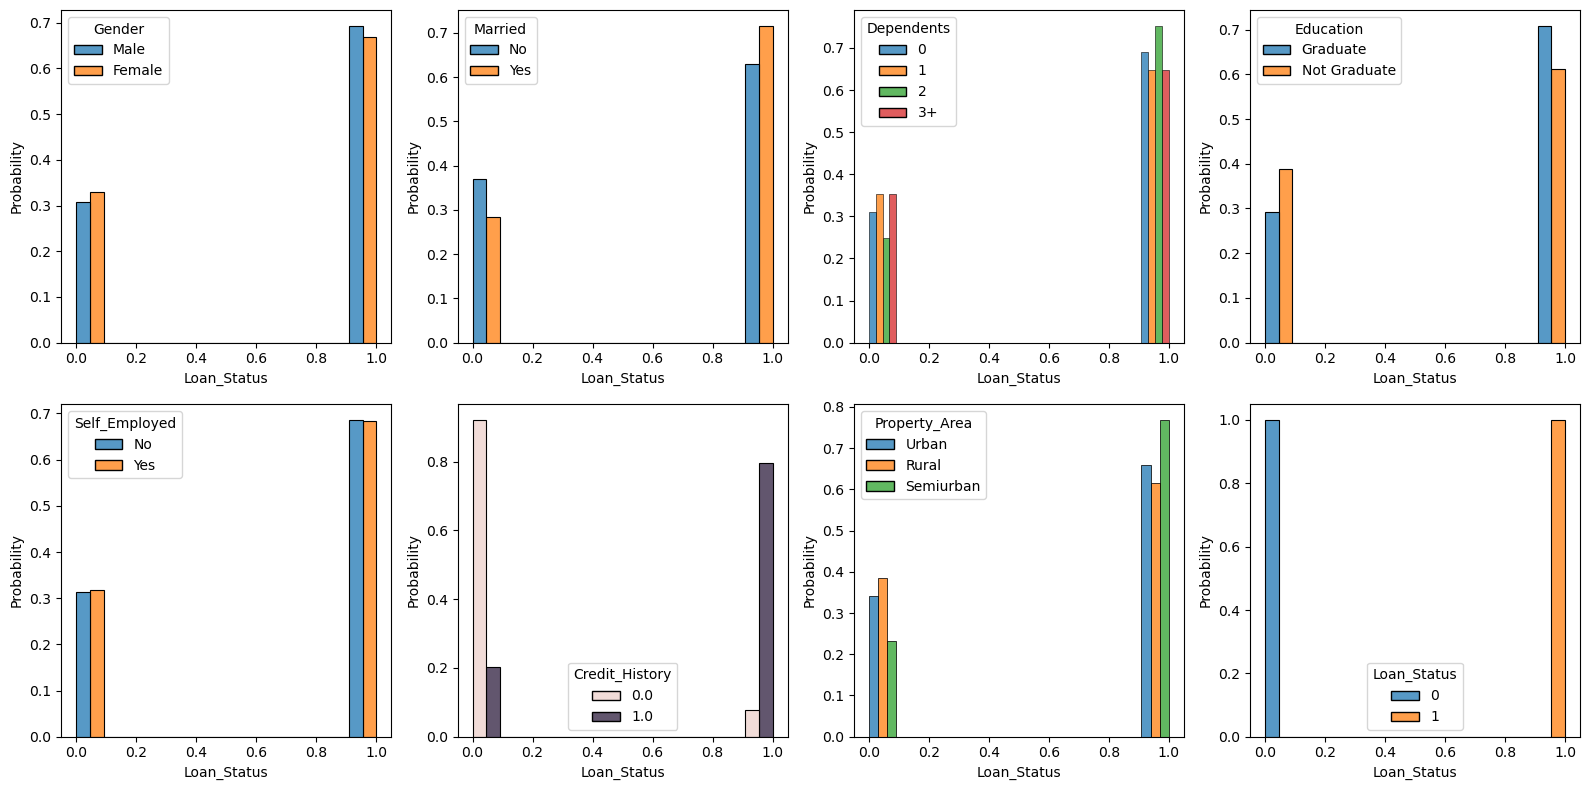

In [28]:
fig, axes = plt.subplots(2, 4, figsize=(16,8))
for i, ax in enumerate(axes.ravel()):
    sns.histplot(x=train['Loan_Status'], hue=train[categorical[i]], multiple='dodge', stat='probability', common_norm=False, ax=ax)
plt.tight_layout()

In the above plots, compare the bars in each label class to know the association between category and label class.

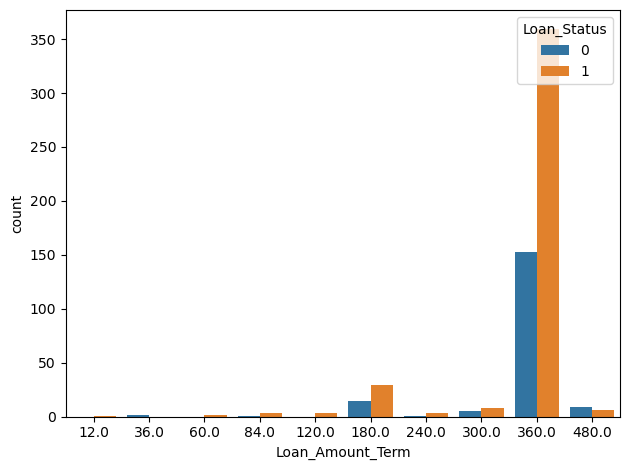

In [29]:
sns.countplot(x=train['Loan_Amount_Term'], hue=train['Loan_Status'])
plt.tight_layout()

In [30]:
train.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


## pair plot

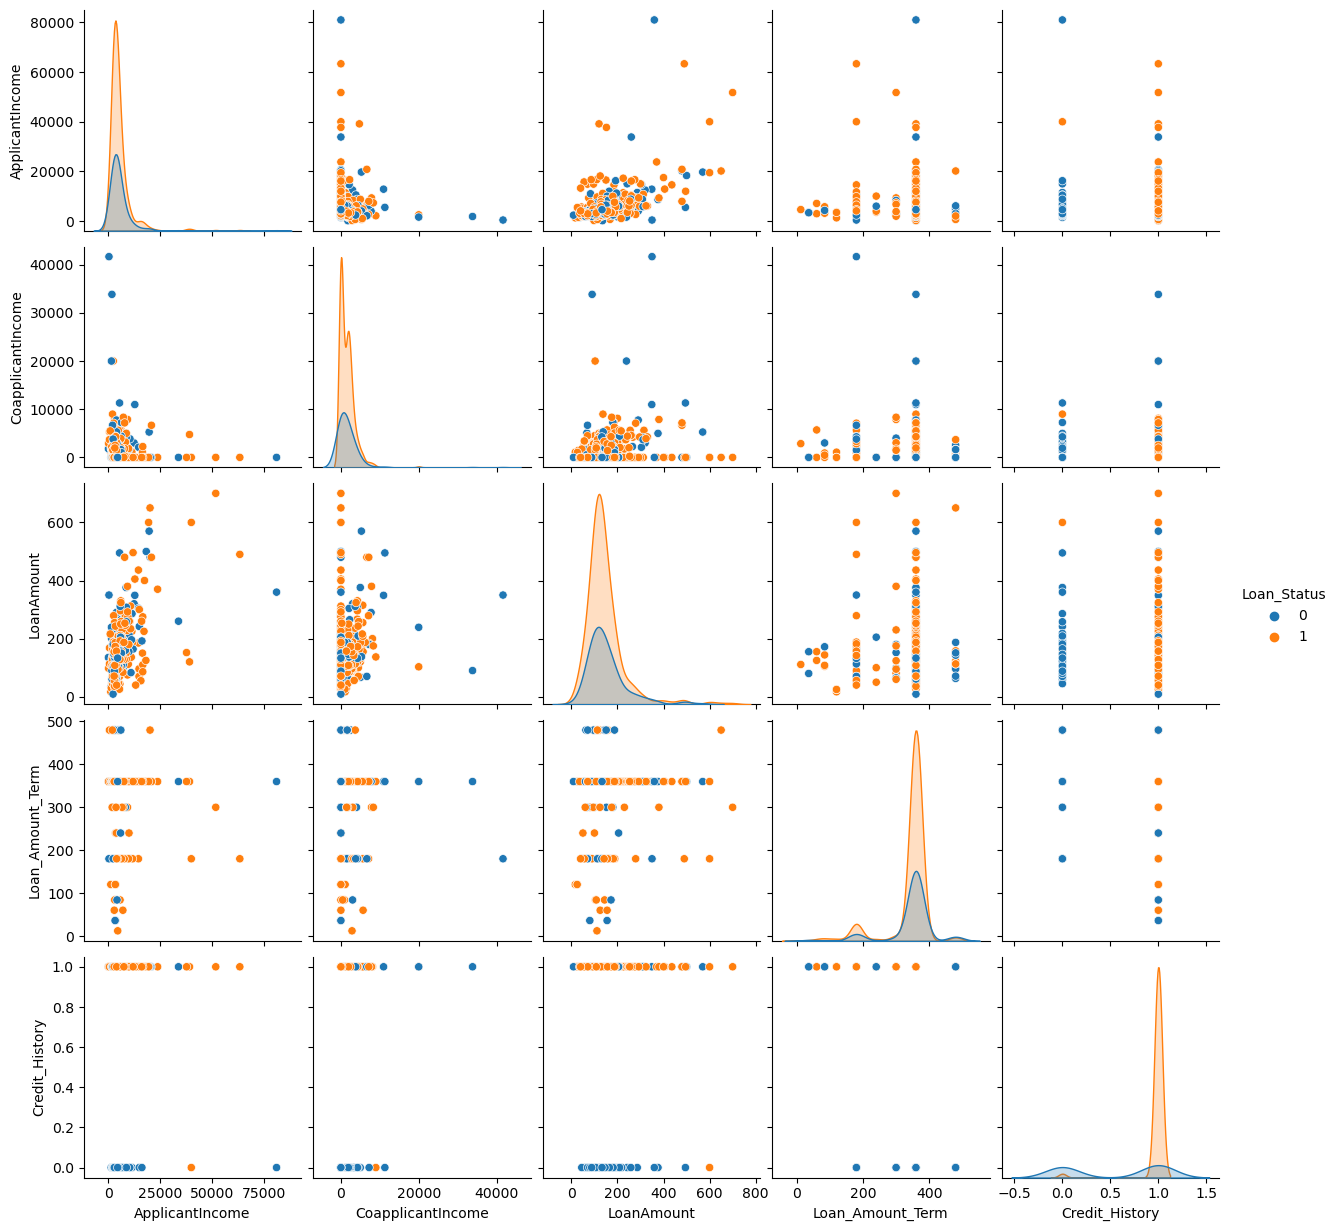

In [31]:
sns.pairplot(train.iloc[:, 5:], hue='Loan_Status')

# correlations

In [32]:
continuous

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [33]:
categorical

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [34]:
from itertools import product

In [35]:
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.nanmean(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

In [36]:
def cat_cont(df, categorical_features, continuous_features):
    eta_corr = []
    for pair in product(categorical_features, continuous_features):
        try:
            eta_corr.append(correlation_ratio(df[pair[0]], df[pair[1]]))
        except ValueError:
            eta_corr.append(0)
    eta_corr = np.array(eta_corr).reshape(len(categorical_features),len(continuous_features))
    eta_corr = pd.DataFrame(eta_corr, index=categorical_features, columns=continuous_features)
    return eta_corr

In [37]:
cat_cont_corr = cat_cont(train, categorical, continuous)

In [38]:
cat_cont_corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
Gender,0.050672,0.083658,0.103532,0.075638
Married,0.051304,0.077726,0.152096,0.104416
Dependents,0.168726,0.048789,0.189647,0.131139
Education,0.140760,0.062290,0.175369,0.080358
Self_Employed,0.129354,0.009226,0.122029,0.036673
Credit_History,0.014476,0.001664,0.008037,0.001440
Property_Area,0.017427,0.028671,0.047818,0.100034
Loan_Status,0.004710,0.059187,0.038242,0.021566


In [39]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = sp.stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [40]:
def cat_cat(df, cat_features):
    cramers_v_corr = []
    for pair in product(cat_features, repeat=2):
        try:
            cramers_v_corr.append(cramers_v(df[pair[0]], df[pair[1]]))
        except ValueError:
            cramers_v_corr.append(0)
    cramers_v_corr = np.array(cramers_v_corr).reshape(len(cat_features),len(cat_features))
    cramers_v_corr = pd.DataFrame(cramers_v_corr, index=cat_features, columns=cat_features)
    return cramers_v_corr

In [41]:
cat_cat_corr = cat_cat(train, categorical)

In [42]:
cat_cat_corr

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
Gender,0.994504,0.363110,0.166717,0.016721,0.000000,0.000000,0.100240,0.000000
Married,0.363110,0.996390,0.363311,0.000000,0.000000,0.000000,0.000000,0.075459
Dependents,0.166717,0.363311,1.000000,0.000000,0.074534,0.000000,0.029845,0.016012
Education,0.016721,0.000000,0.000000,0.995219,0.000000,0.063178,0.052455,0.070997
Self_Employed,0.000000,0.000000,0.074534,0.000000,0.992890,0.000000,0.000000,0.000000
Credit_History,0.000000,0.000000,0.000000,0.063178,0.000000,0.993317,0.000000,0.555349
Property_Area,0.100240,0.000000,0.029845,0.052455,0.000000,0.000000,1.000000,0.129590
Loan_Status,0.000000,0.075459,0.016012,0.070997,0.000000,0.555349,0.129590,0.996205


In [43]:
train.loc[:, continuous].corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878
LoanAmount,0.570909,0.188619,1.000000,0.039447
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000


In [44]:
pd.merge(cat_cat_corr, cat_cont_corr, left_index=True, right_index=True)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
Gender,0.994504,0.363110,0.166717,0.016721,0.000000,0.000000,0.100240,0.000000,0.050672,0.083658,0.103532,0.075638
Married,0.363110,0.996390,0.363311,0.000000,0.000000,0.000000,0.000000,0.075459,0.051304,0.077726,0.152096,0.104416
Dependents,0.166717,0.363311,1.000000,0.000000,0.074534,0.000000,0.029845,0.016012,0.168726,0.048789,0.189647,0.131139
Education,0.016721,0.000000,0.000000,0.995219,0.000000,0.063178,0.052455,0.070997,0.140760,0.062290,0.175369,0.080358
Self_Employed,0.000000,0.000000,0.074534,0.000000,0.992890,0.000000,0.000000,0.000000,0.129354,0.009226,0.122029,0.036673
Credit_History,0.000000,0.000000,0.000000,0.063178,0.000000,0.993317,0.000000,0.555349,0.014476,0.001664,0.008037,0.001440
Property_Area,0.100240,0.000000,0.029845,0.052455,0.000000,0.000000,1.000000,0.129590,0.017427,0.028671,0.047818,0.100034
Loan_Status,0.000000,0.075459,0.016012,0.070997,0.000000,0.555349,0.129590,0.996205,0.004710,0.059187,0.038242,0.021566


In [45]:
pd.concat([cat_cont_corr, train.loc[:, continuous].corr()])

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
Gender,0.050672,0.083658,0.103532,0.075638
Married,0.051304,0.077726,0.152096,0.104416
Dependents,0.168726,0.048789,0.189647,0.131139
Education,0.140760,0.062290,0.175369,0.080358
Self_Employed,0.129354,0.009226,0.122029,0.036673
Credit_History,0.014476,0.001664,0.008037,0.001440
Property_Area,0.017427,0.028671,0.047818,0.100034
Loan_Status,0.004710,0.059187,0.038242,0.021566
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878


In [46]:
all_corr = pd.concat([pd.merge(cat_cat_corr, cat_cont_corr, left_index=True, right_index=True), train.loc[:, continuous].corr()])

In [47]:
all_corr

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
Gender,0.994504,0.363110,0.166717,0.016721,0.000000,0.000000,0.100240,0.000000,0.050672,0.083658,0.103532,0.075638
Married,0.363110,0.996390,0.363311,0.000000,0.000000,0.000000,0.000000,0.075459,0.051304,0.077726,0.152096,0.104416
Dependents,0.166717,0.363311,1.000000,0.000000,0.074534,0.000000,0.029845,0.016012,0.168726,0.048789,0.189647,0.131139
Education,0.016721,0.000000,0.000000,0.995219,0.000000,0.063178,0.052455,0.070997,0.140760,0.062290,0.175369,0.080358
Self_Employed,0.000000,0.000000,0.074534,0.000000,0.992890,0.000000,0.000000,0.000000,0.129354,0.009226,0.122029,0.036673
Credit_History,0.000000,0.000000,0.000000,0.063178,0.000000,0.993317,0.000000,0.555349,0.014476,0.001664,0.008037,0.001440
Property_Area,0.100240,0.000000,0.029845,0.052455,0.000000,0.000000,1.000000,0.129590,0.017427,0.028671,0.047818,0.100034
Loan_Status,0.000000,0.075459,0.016012,0.070997,0.000000,0.555349,0.129590,0.996205,0.004710,0.059187,0.038242,0.021566
ApplicantIncome,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-0.116605,0.570909,-0.045306
CoapplicantIncome,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.116605,1.000000,0.188619,-0.059878


In [48]:
cat_cont_corr.T

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
ApplicantIncome,0.050672,0.051304,0.168726,0.140760,0.129354,0.014476,0.017427,0.004710
CoapplicantIncome,0.083658,0.077726,0.048789,0.062290,0.009226,0.001664,0.028671,0.059187
LoanAmount,0.103532,0.152096,0.189647,0.175369,0.122029,0.008037,0.047818,0.038242
Loan_Amount_Term,0.075638,0.104416,0.131139,0.080358,0.036673,0.001440,0.100034,0.021566


In [49]:
all_corr.update(cat_cont_corr.T)

In [50]:
all_corr

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
Gender,0.994504,0.363110,0.166717,0.016721,0.000000,0.000000,0.100240,0.000000,0.050672,0.083658,0.103532,0.075638
Married,0.363110,0.996390,0.363311,0.000000,0.000000,0.000000,0.000000,0.075459,0.051304,0.077726,0.152096,0.104416
Dependents,0.166717,0.363311,1.000000,0.000000,0.074534,0.000000,0.029845,0.016012,0.168726,0.048789,0.189647,0.131139
Education,0.016721,0.000000,0.000000,0.995219,0.000000,0.063178,0.052455,0.070997,0.140760,0.062290,0.175369,0.080358
Self_Employed,0.000000,0.000000,0.074534,0.000000,0.992890,0.000000,0.000000,0.000000,0.129354,0.009226,0.122029,0.036673
Credit_History,0.000000,0.000000,0.000000,0.063178,0.000000,0.993317,0.000000,0.555349,0.014476,0.001664,0.008037,0.001440
Property_Area,0.100240,0.000000,0.029845,0.052455,0.000000,0.000000,1.000000,0.129590,0.017427,0.028671,0.047818,0.100034
Loan_Status,0.000000,0.075459,0.016012,0.070997,0.000000,0.555349,0.129590,0.996205,0.004710,0.059187,0.038242,0.021566
ApplicantIncome,0.050672,0.051304,0.168726,0.140760,0.129354,0.014476,0.017427,0.004710,1.000000,-0.116605,0.570909,-0.045306
CoapplicantIncome,0.083658,0.077726,0.048789,0.062290,0.009226,0.001664,0.028671,0.059187,-0.116605,1.000000,0.188619,-0.059878


<AxesSubplot:>

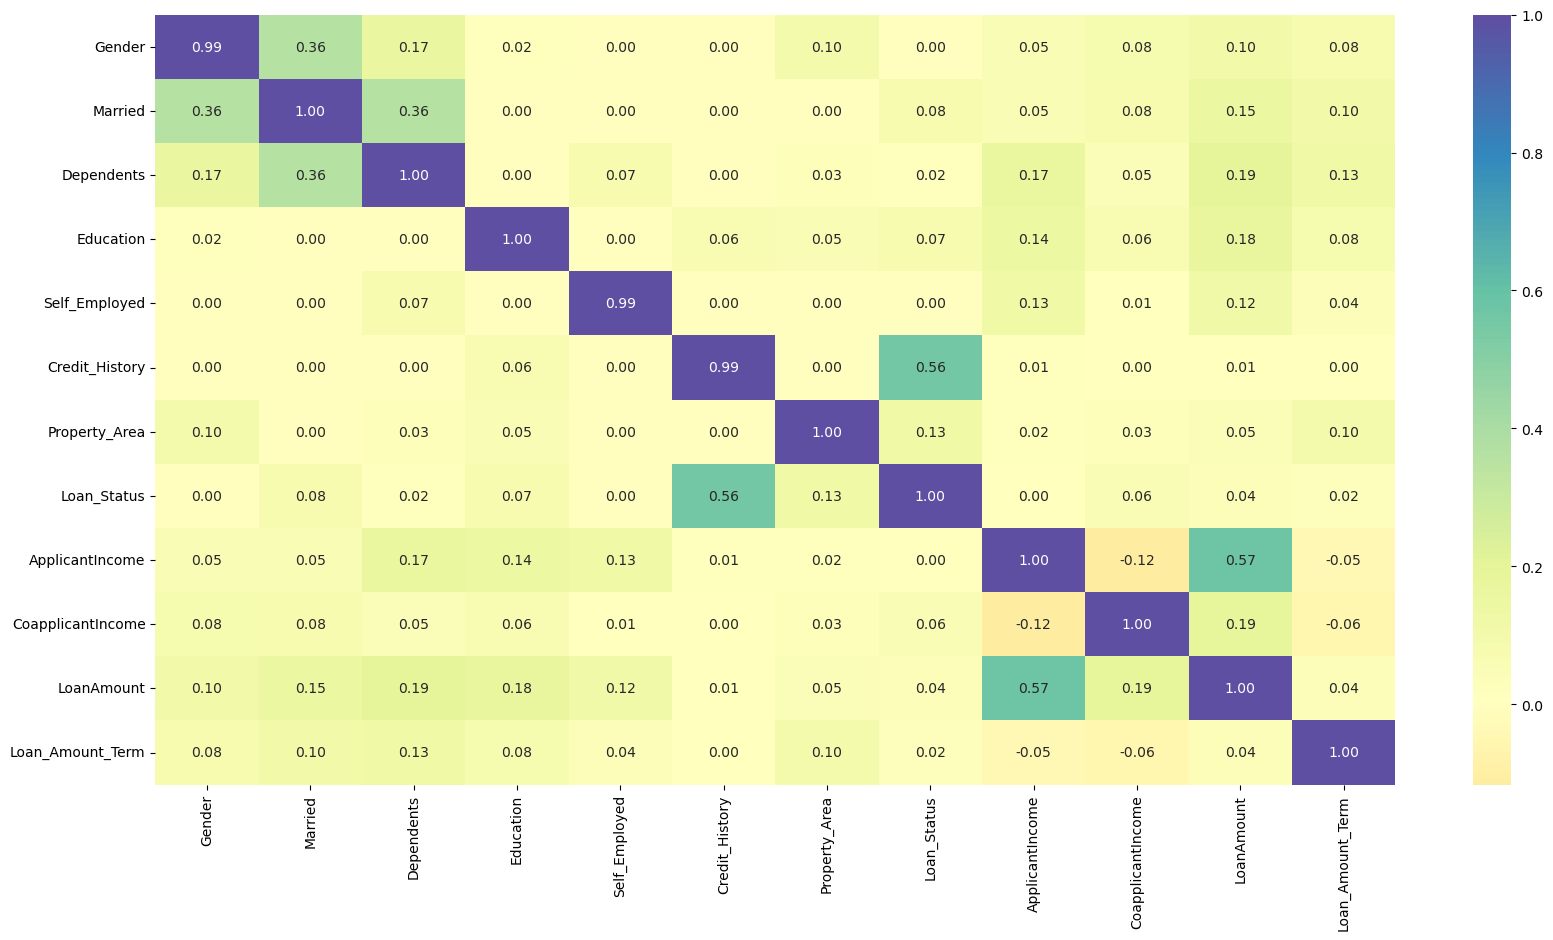

In [51]:
plt.figure(figsize=(20,10))
sns.heatmap(all_corr, annot=True, cmap='Spectral', center=0, fmt='.2f')

In [52]:
pd.crosstab(train['Gender'], train['Dependents'], normalize='index') / train['Dependents'].value_counts()*10000 

Dependents,0,1,2,3+
Gender,,,,
Female,21.273767,17.089405,6.358434,5.396654
Male,15.677696,16.853702,19.096249,18.497965


In [53]:
def cross_tab(col1, col2, figsize = (12,6)):
    plt.figure(figsize=figsize)
    sns.heatmap(pd.crosstab(col1, col2, normalize='index') / col2.value_counts()*10000,
                annot=True, center=0, cmap='Spectral')

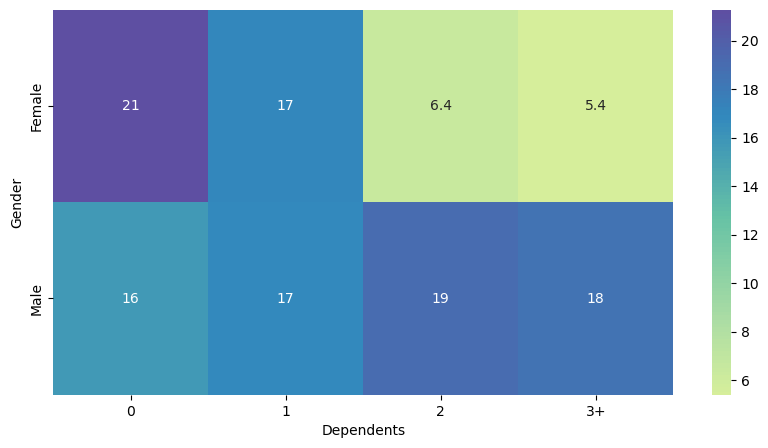

In [54]:
cross_tab(train['Gender'], train['Dependents'], (10,5))

In [55]:
class Correlations:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def correlation_ratio(categories, measurements):
        fcat, _ = pd.factorize(categories)
        cat_num = np.max(fcat)+1
        y_avg_array = np.zeros(cat_num)
        n_array = np.zeros(cat_num)
        for i in range(0,cat_num):
            cat_measures = measurements[np.argwhere(fcat == i).flatten()]
            n_array[i] = len(cat_measures)
            y_avg_array[i] = np.average(cat_measures)
        y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
        numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
        denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
        if numerator == 0:
            eta = 0.0
        else:
            eta = np.sqrt(numerator/denominator)
        return eta
    def square(self):
        return self.x**self.y
    def cube(self, w):
        return Correlations.square(self)**w

# Variable analysis

## Applicant Income

In [17]:
train['ApplicantIncome'].min()

150

In [18]:
train['ApplicantIncome'].max()

81000

In [19]:
train['ApplicantIncome'].median()

3812.5

In [20]:
train['ApplicantIncome'].mean()

5403.459283387622

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

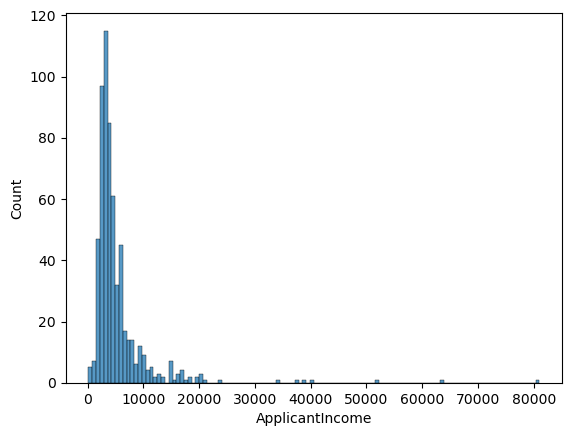

In [21]:
sns.histplot(train['ApplicantIncome'])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

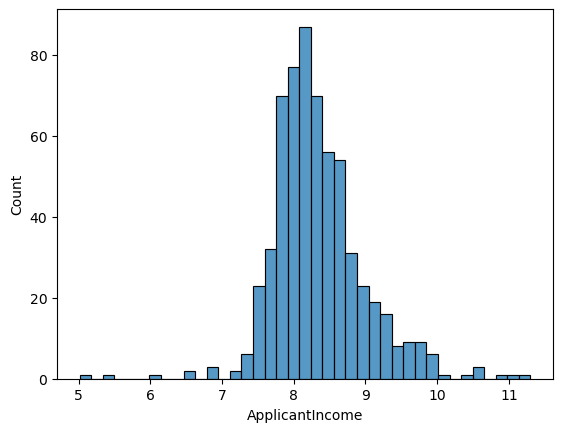

In [22]:
sns.histplot(np.log(train['ApplicantIncome']))

In [23]:
from scipy.stats import yeojohnson

<AxesSubplot:ylabel='Count'>

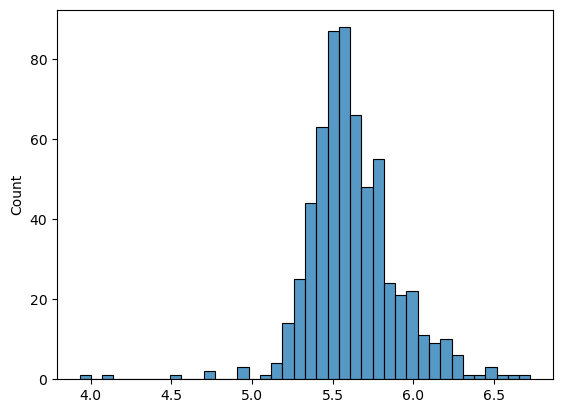

In [24]:
sns.histplot(yeojohnson(train['ApplicantIncome'], lmbda=None)[0])

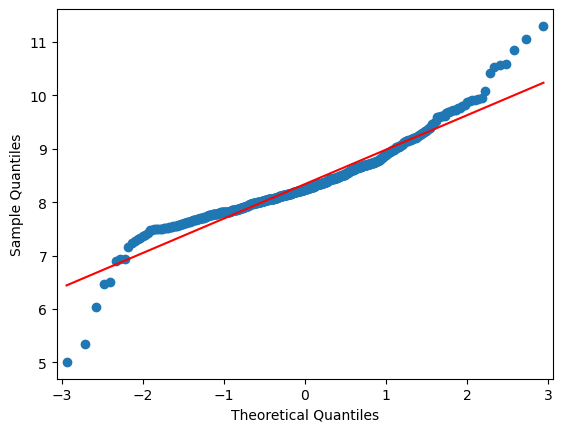

In [25]:
sm.qqplot(np.log(train['ApplicantIncome']), line='s');

## Co-applicant Income

In [26]:
train['CoapplicantIncome'].min()

0.0

In [27]:
train.shape

(614, 12)

In [28]:
train[train['CoapplicantIncome']==0]['Loan_Status'].value_counts()

1    177
0     96
Name: Loan_Status, dtype: int64

In [29]:
train[train['CoapplicantIncome']!=0]['Loan_Status'].value_counts()

1    245
0     96
Name: Loan_Status, dtype: int64

### New features

In [30]:
train['Coapplicant'] = train['CoapplicantIncome'].apply(lambda x: 1 if x > 0 else 0)

In [31]:
train['Combined_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']

In [32]:
test['Coapplicant'] = test['CoapplicantIncome'].apply(lambda x: 1 if x > 0 else 0)

In [33]:
test['Combined_Income'] = test['ApplicantIncome'] + train['CoapplicantIncome']

In [34]:
train['CoapplicantIncome'].max()

41667.0

In [35]:
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Coapplicant,Combined_Income
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1,0,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,1,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,0,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,1,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,0,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1,0,2900.0
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1,0,4106.0
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1,1,8312.0
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1,0,7583.0


In [36]:
train['CoapplicantIncome'].median()

1188.5

In [37]:
train['CoapplicantIncome'].mean()

1621.245798027101

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Count'>

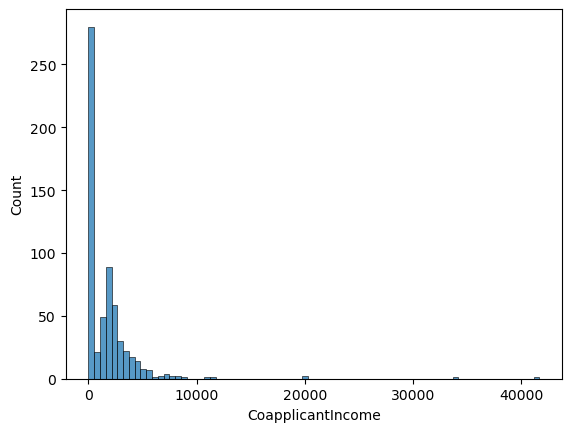

In [38]:
sns.histplot(train['CoapplicantIncome'])

<AxesSubplot:xlabel='Combined_Income', ylabel='Count'>

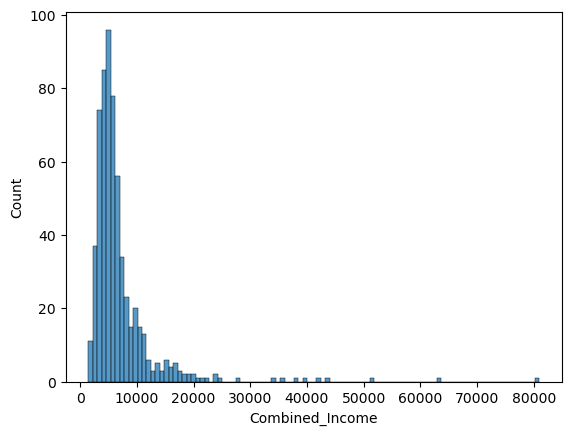

In [39]:
sns.histplot(train['Combined_Income'])

C:\Users\dsanr\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Count'>

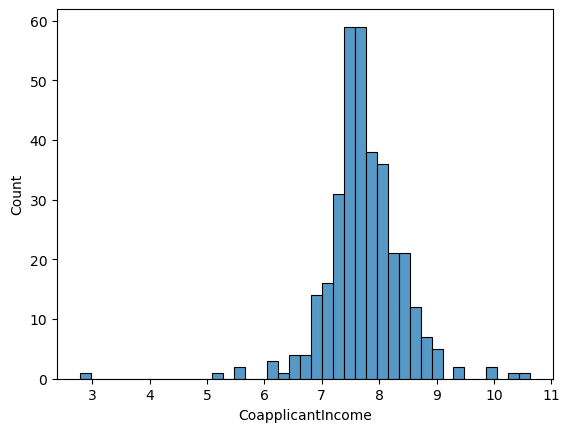

In [40]:
sns.histplot(np.log(train['CoapplicantIncome']))

<AxesSubplot:xlabel='Combined_Income', ylabel='Count'>

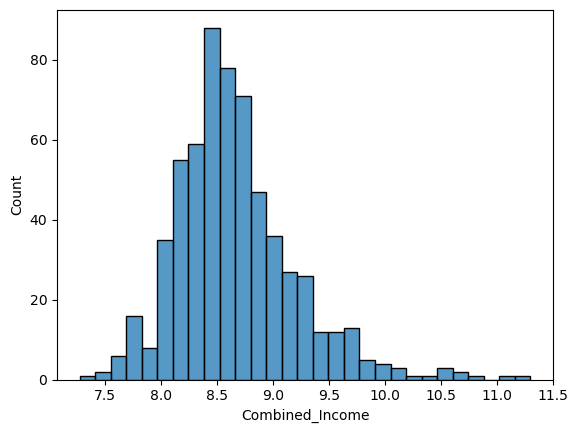

In [41]:
sns.histplot(np.log(train['Combined_Income']))

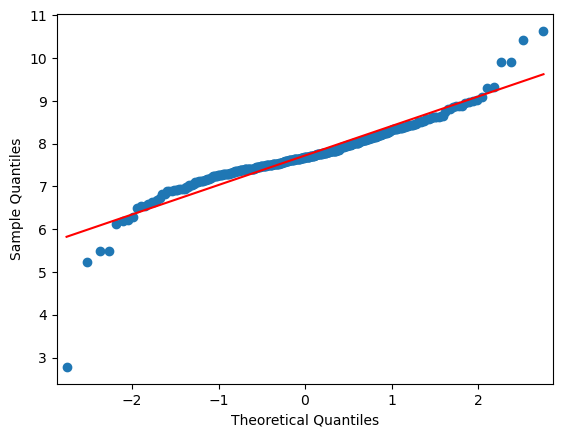

In [42]:
sm.qqplot(np.log(train[train['CoapplicantIncome']!=0]['CoapplicantIncome']), line='s');

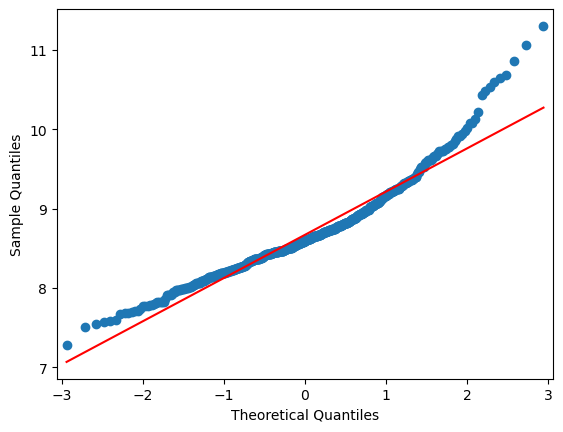

In [43]:
sm.qqplot(np.log(train['Combined_Income']), line='s');

## Loan Amount

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

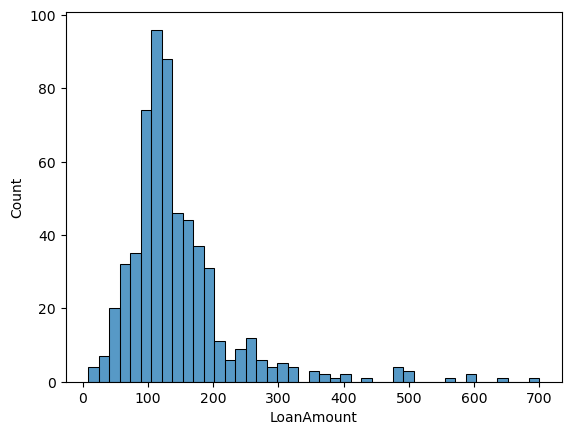

In [44]:
sns.histplot(train['LoanAmount'])

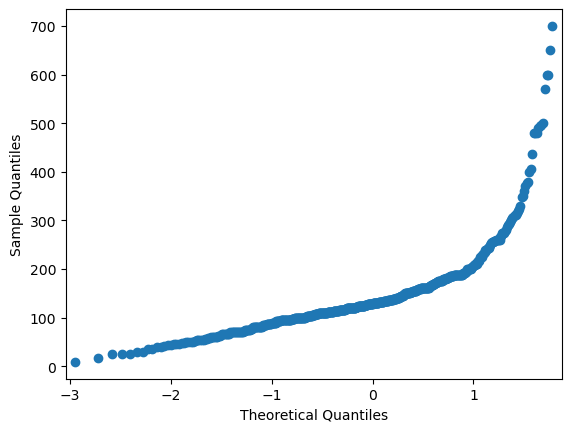

In [45]:
sm.qqplot(train['LoanAmount'], line='s');

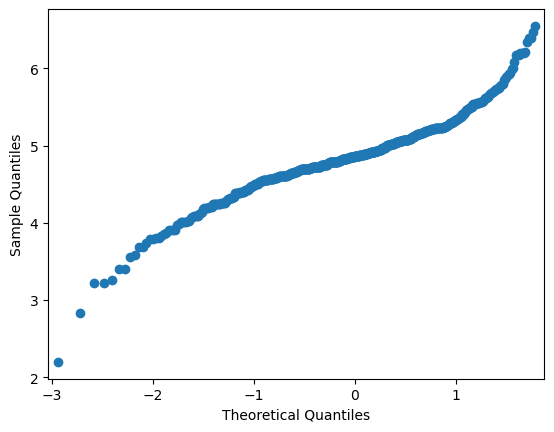

In [46]:
sm.qqplot(np.log(train['LoanAmount']), line='s');

In [47]:
train['EMI'] = train['LoanAmount'] * 1000 / train['Loan_Amount_Term']

In [48]:
test['EMI'] = test['LoanAmount'] * 1000 / test['Loan_Amount_Term']

<AxesSubplot:xlabel='EMI', ylabel='Count'>

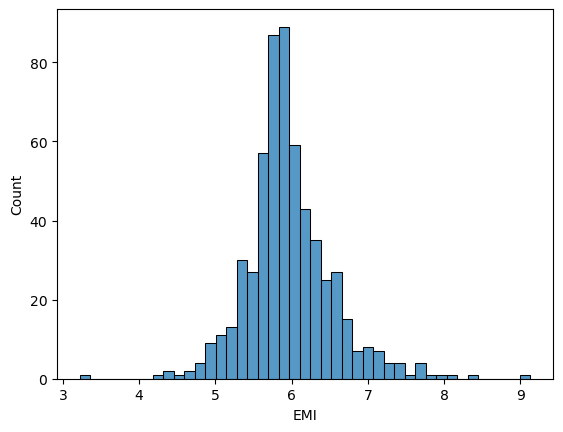

In [49]:
sns.histplot(np.log(train['EMI']))

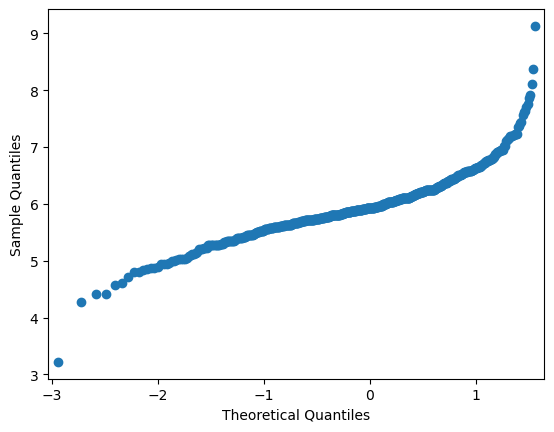

In [50]:
sm.qqplot(np.log(train['EMI']), line='s');

## Loan Amount Term

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Count'>

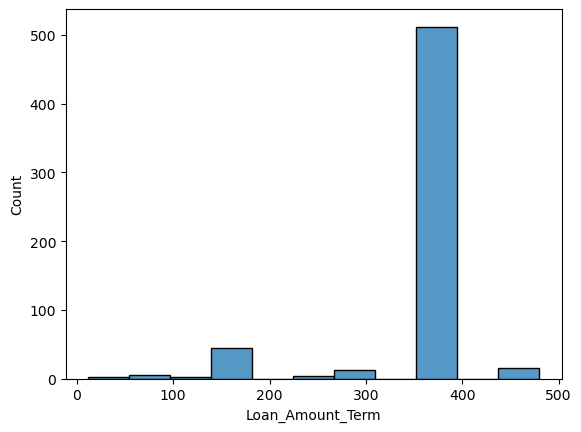

In [51]:
sns.histplot(train['Loan_Amount_Term'])

In [52]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [53]:
test['Loan_Amount_Term'].value_counts()

360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
60.0       1
12.0       1
350.0      1
36.0       1
120.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [54]:
train[train['Loan_Amount_Term'] < 180]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Coapplicant,Combined_Income,EMI
14,Male,Yes,2,Graduate,No,1299,1086.0,17.0,120.0,1.0,Urban,1,1,2385.0,141.666667
68,Male,Yes,3+,Not Graduate,Yes,7100,0.0,125.0,60.0,1.0,Urban,1,0,7100.0,2083.333333
94,Male,No,0,Not Graduate,No,3620,0.0,25.0,120.0,1.0,Semiurban,1,0,3620.0,208.333333
133,Male,Yes,0,Graduate,Yes,3459,0.0,25.0,120.0,1.0,Semiurban,1,0,3459.0,208.333333
242,Male,No,0,Graduate,No,2965,5701.0,155.0,60.0,1.0,Urban,1,1,8666.0,2583.333333
262,Female,No,1,Graduate,No,3481,0.0,155.0,36.0,1.0,Semiurban,0,0,3481.0,4305.555556
313,Male,Yes,2,Graduate,Yes,5746,0.0,144.0,84.0,NaN,Rural,1,0,5746.0,1714.285714
495,Female,Yes,1,Graduate,No,3326,913.0,105.0,84.0,1.0,Semiurban,1,1,4239.0,1250.000000
497,Male,Yes,0,Graduate,No,4625,2857.0,111.0,12.0,NaN,Urban,1,1,7482.0,9250.000000
546,Male,No,0,Not Graduate,No,3358,0.0,80.0,36.0,1.0,Semiurban,0,0,3358.0,2222.222222


# Preprocessing

In [17]:
from sklearn.preprocessing import PowerTransformer, StandardScaler, FunctionTransformer, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [18]:
X = train.drop(columns=['Loan_Status'])

In [19]:
y = train['Loan_Status']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 101)

In [21]:
X_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [25]:
continuous

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [26]:
log = ColumnTransformer([('cont', FunctionTransformer(np.log1p, feature_names_out='one-to-one', validate=True),
                        continuous)], remainder='passthrough', verbose_feature_names_out=False).set_output(transform='pandas')

In [63]:
for i in ['ApplicantIncome', 'CoapplicantIncome', 'Combined_Income', 'LoanAmount', 'EMI']:
    X_train[i] = X_train[i].apply(lambda x : np.log(x+1))

In [64]:
for i in ['ApplicantIncome', 'CoapplicantIncome', 'Combined_Income', 'LoanAmount', 'EMI']:
    X_test[i] = X_test[i].apply(lambda x : np.log(x+1))

In [65]:
for i in ['ApplicantIncome', 'CoapplicantIncome', 'Combined_Income', 'LoanAmount', 'EMI']:
    test[i] = test[i].apply(lambda x : np.log(x+1))

## impute

In [27]:
categorical

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [28]:
ohe_columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History']

In [29]:
ord_columns = ['Dependents', 'Property_Area']

In [30]:
X_train.isna().mean()

Gender               0.019565
Married              0.002174
Dependents           0.017391
Education            0.000000
Self_Employed        0.050000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.034783
Loan_Amount_Term     0.023913
Credit_History       0.078261
Property_Area        0.000000
dtype: float64

In [31]:
imputer = ColumnTransformer([('cont', SimpleImputer(strategy='median'), continuous), 
                            ('cat', SimpleImputer(strategy='most_frequent'), ohe_columns+ord_columns)], 
                            verbose_feature_names_out=False).set_output(transform='pandas')

In [32]:
imputer.fit(X_train)

ColumnTransformer(transformers=[('cont', SimpleImputer(strategy='median'),
                                 ['ApplicantIncome', 'CoapplicantIncome',
                                  'LoanAmount', 'Loan_Amount_Term']),
                                ('cat', SimpleImputer(strategy='most_frequent'),
                                 ['Gender', 'Married', 'Education',
                                  'Self_Employed', 'Credit_History',
                                  'Dependents', 'Property_Area'])],
                  verbose_feature_names_out=False)

In [33]:
imputer.feature_names_in_

array(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype=object)

In [34]:
imputer.get_feature_names_out()

array(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Gender', 'Married', 'Education',
       'Self_Employed', 'Credit_History', 'Dependents', 'Property_Area'],
      dtype=object)

In [35]:
X_train = imputer.transform(X_train)

In [36]:
X_test = imputer.transform(X_test)

## scale

In [37]:
scaling = ColumnTransformer([('scale', StandardScaler(), continuous),
                             ('ohe', OneHotEncoder(drop='first', sparse_output=False), ohe_columns),
                 ('ord', OrdinalEncoder(categories=[['0', '1', '2', '3+'], ['Rural', 'Semiurban', 'Urban']]), ord_columns)], 
                           verbose_feature_names_out=False)

In [38]:
pipe = Pipeline([('log', log), ('scale', scaling)]).set_output(transform='pandas')

In [39]:
pipe.fit(X_train)

Pipeline(steps=[('log',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cont',
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<ufunc 'log1p'>,
                                                                      validate=True),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term'])],
                                   verbose_feature_names_out=False)),
                ('scale',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term']),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Gender', 'Married',
                                                   'Education', 'Self_Employed',
                                                   'Credit_History']),
                                                 ('ord',
                                                  OrdinalEncoder(categories=[['0',
                                                                              '1',
                                                                              '2',
                                                                              '3+'],
                                                                             ['Rural',
                                                                              'Semiurban',
                                                                              'Urban']]),
                                                  ['Dependents',
                                                   'Property_Area'])],
                                   verbose_feature_names_out=False))])

In [47]:
pipe.feature_names_in_

array(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Gender', 'Married', 'Education',
       'Self_Employed', 'Credit_History', 'Dependents', 'Property_Area'],
      dtype=object)

In [48]:
pipe.get_feature_names_out()

array(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Gender_Male', 'Married_Yes',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Credit_History_1.0', 'Dependents', 'Property_Area'], dtype=object)

In [41]:
X_train = pipe.fit_transform(X_train)

In [42]:
X_test = pipe.fit_transform(X_test)

In [49]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 460 entries, 425 to 523
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ApplicantIncome         460 non-null    float64
 1   CoapplicantIncome       460 non-null    float64
 2   LoanAmount              460 non-null    float64
 3   Loan_Amount_Term        460 non-null    float64
 4   Gender_Male             460 non-null    float64
 5   Married_Yes             460 non-null    float64
 6   Education_Not Graduate  460 non-null    float64
 7   Self_Employed_Yes       460 non-null    float64
 8   Credit_History_1.0      460 non-null    float64
 9   Dependents              460 non-null    float64
 10  Property_Area           460 non-null    float64
dtypes: float64(11)
memory usage: 43.1 KB


# Predictions on train data

In [43]:
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, precision_recall_curve, det_curve
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, DetCurveDisplay, RocCurveDisplay, PrecisionRecallDisplay

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense

In [44]:
def model_score(model):
    model.fit(X_train, y_train)
    print(model.score(X_train, y_train), model.score(X_test, y_test))
    return model

## Neural Network

In [51]:
X_train.shape

(460, 11)

In [52]:
input_neurons = X_train.shape[1]

In [53]:
output_neurons = 1

In [54]:
number_of_hidden_layers = 2
neurons_hidden_layer_1 = 10
neurons_hidden_layer_2 = 5

In [56]:
# defining the architecture of the model
model = Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=neurons_hidden_layer_1, activation='relu'))
model.add(Dense(units=neurons_hidden_layer_2, activation='relu'))
model.add(Dense(units=output_neurons, activation='sigmoid'))

In [59]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [117]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [118]:
model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=50)

Epoch 1/50
15/15 [==============================] - 1s 9ms/step - loss: 0.3124 - accuracy: 0.8804 - val_loss: 0.7069 - val_accuracy: 0.7727
Epoch 2/50
15/15 [==============================] - 0s 3ms/step - loss: 0.3100 - accuracy: 0.8804 - val_loss: 0.6878 - val_accuracy: 0.7597
Epoch 3/50
15/15 [==============================] - 0s 3ms/step - loss: 0.3096 - accuracy: 0.8804 - val_loss: 0.6992 - val_accuracy: 0.7662
Epoch 4/50
15/15 [==============================] - 0s 3ms/step - loss: 0.3094 - accuracy: 0.8826 - val_loss: 0.6937 - val_accuracy: 0.7662
Epoch 5/50
15/15 [==============================] - 0s 3ms/step - loss: 0.3078 - accuracy: 0.8761 - val_loss: 0.6845 - val_accuracy: 0.7597
Epoch 6/50
15/15 [==============================] - 0s 3ms/step - loss: 0.3086 - accuracy: 0.8761 - val_loss: 0.6927 - val_accuracy: 0.7662
Epoch 7/50
15/15 [==============================] - 0s 3ms/step - loss: 0.3085 - accuracy: 0.8804 - val_loss: 0.6985 - val_accuracy: 0.7662
Epoch 8/50
15/15 [==

In [114]:
prediction = model.predict(X_test)

5/5 [==============================] - 0s 732us/step


In [115]:
prediction = (prediction >=0.5).astype(int)

In [116]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.79      0.49      0.61        55
           1       0.77      0.93      0.84        99

    accuracy                           0.77       154
   macro avg       0.78      0.71      0.72       154
weighted avg       0.78      0.77      0.76       154



In [88]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

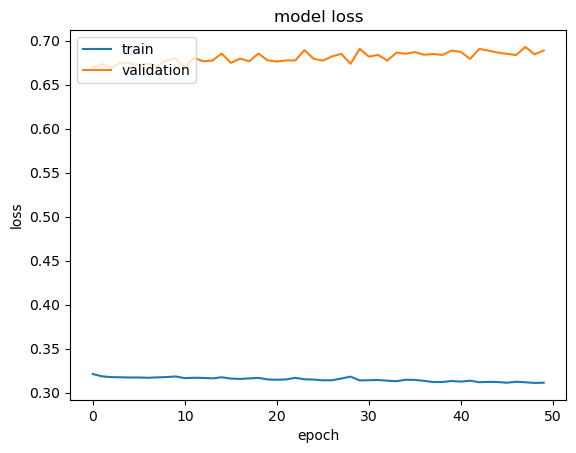

In [110]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

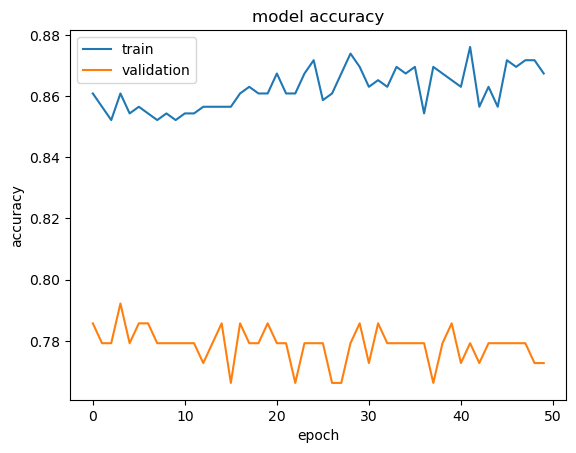

In [90]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Logistic Regression

In [45]:
lr = LogisticRegression(max_iter=1000)

In [46]:
lr = model_score(lr)

0.8152173913043478 0.7922077922077922


In [129]:
pred = lr.predict(X_test)

In [130]:
pred

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [131]:
pred_prob = pd.DataFrame(lr.predict_proba(X_test), index=y_test.index)

In [132]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.44      0.60        55
           1       0.76      0.99      0.86        99

    accuracy                           0.79       154
   macro avg       0.86      0.71      0.73       154
weighted avg       0.83      0.79      0.77       154



<AxesSubplot:>

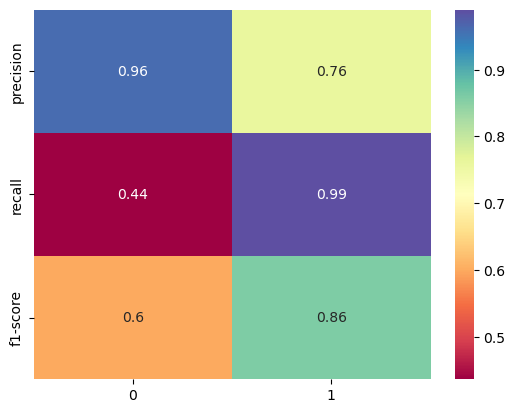

In [133]:
sns.heatmap(pd.DataFrame(classification_report(y_test, pred, output_dict=True)).iloc[:-1, :2],
            cmap='Spectral', annot=True)

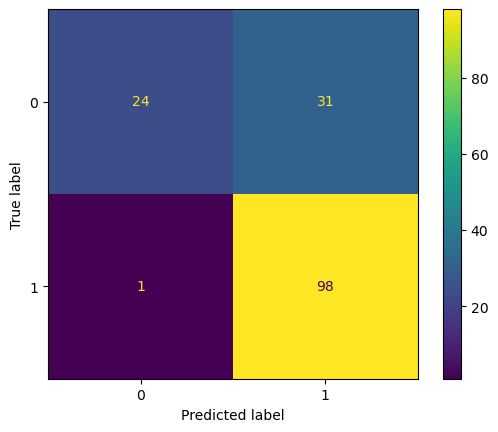

In [134]:
ConfusionMatrixDisplay.from_predictions(y_test, pred)

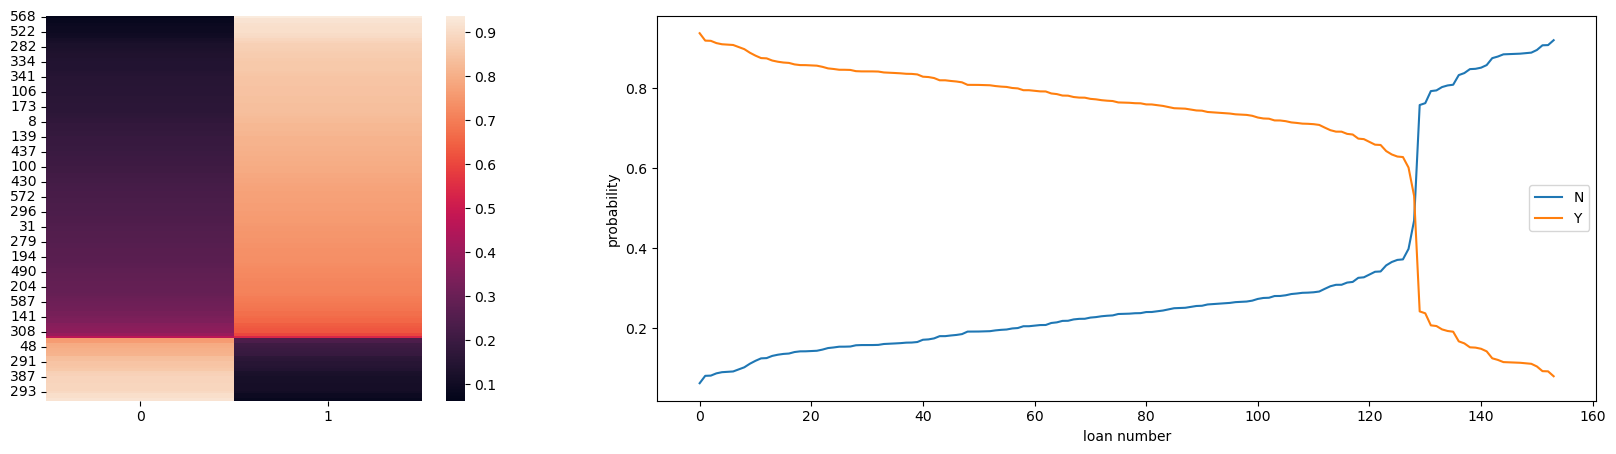

In [135]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5), gridspec_kw={'width_ratios': [1, 2]})
sns.heatmap(pred_prob.sort_values(by=0), ax=ax1)
ax2.plot(pred_prob.sort_values(by=0).values)
ax2.set_xlabel('loan number')
ax2.set_ylabel('probability')
ax2.legend(['N', 'Y'])

In [136]:
def classification_metrics(y_test, pred_pos):
    
    fig, axes = plt.subplots(2,3, figsize=(15,8))
    
    # precision-recall curve with maximum f1 score marked and confusion matrix at that point
    precision, recall, thresholds = precision_recall_curve(y_test, pred_pos)
    f1 = (2 * precision * recall) / (precision + recall)
    index_max_f1 = np.nanargmax(f1)
    f1_thresh = thresholds[index_max_f1]
    
    PrecisionRecallDisplay.from_predictions(y_test, pred_pos, ax=axes[0, 0])
    axes[0, 0].scatter(recall[index_max_f1], precision[index_max_f1], 
                       color='green', label=f'max f1 {f1[index_max_f1]:.2f} at {f1_thresh:.2f}')
    axes[0, 0].legend()

    ConfusionMatrixDisplay.from_predictions(y_test, (pred_pos > f1_thresh) * 1, ax=axes[1, 0])
    
    
    # ROC curve with maximum Youden's J marked and confusion matrix at that point
    fpr, tpr, thresholds = roc_curve(y_test, pred_pos)
    Youdens_J = tpr - fpr
    index_max_J = np.nanargmax(Youdens_J)
    J_thresh = thresholds[index_max_J]
    
    RocCurveDisplay.from_predictions(y_test, pred_pos, ax=axes[0, 1])
    axes[0, 1].scatter(fpr[index_max_J], tpr[index_max_J], 
                       color='green', label=f'max J {Youdens_J[index_max_J]:.2f} at {J_thresh:.2f}')
    axes[0, 1].plot([0, 1], [0, 1],'r--')
    axes[0, 1].legend()
    
    ConfusionMatrixDisplay.from_predictions(y_test, (pred_pos > J_thresh) * 1, ax=axes[1, 1])
    
    
    # Det curve with minimum total error marked and confusion matrix at that point
    fpr, fnr, thresholds = det_curve(y_test, pred_pos)
    error = fpr + fnr
    index_min_error = np.nanargmin(error)
    error_thresh = thresholds[index_min_error]
    
    DetCurveDisplay.from_predictions(y_test, pred_pos, ax=axes[0, 2])
    axes[0, 2].scatter(sp.stats.norm.ppf(fpr[index_min_error]), sp.stats.norm.ppf(fnr[index_min_error]),
                       color='green',label=f'min error {error[index_min_error]:.2f} at {error_thresh:.2f}')
    axes[0,2].legend()
    
    ConfusionMatrixDisplay.from_predictions(y_test, (pred_pos > error_thresh) * 1, ax=axes[1, 2])
    

C:\Users\dsanr\AppData\Local\Temp\ipykernel_2828\3851249163.py:7: RuntimeWarning: invalid value encountered in true_divide
  f1 = (2 * precision * recall) / (precision + recall)


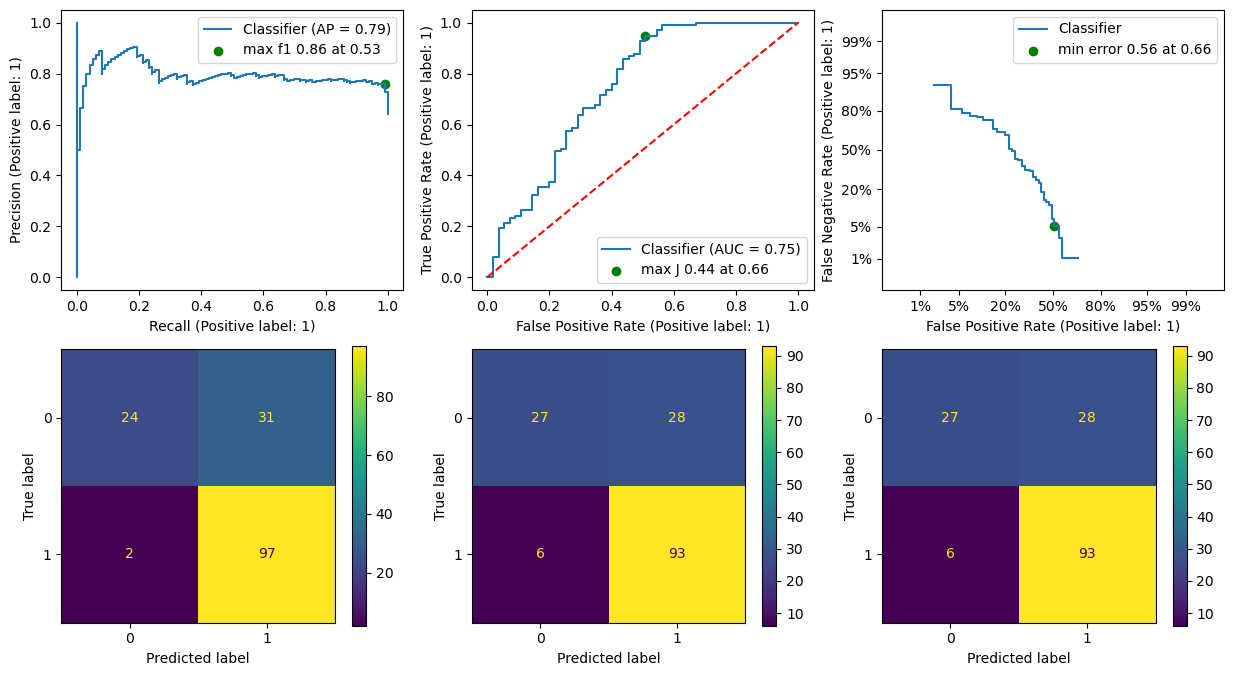

In [137]:
classification_metrics(y_test, pred_prob[1])

Text(0.5, 1.0, 'blue - actual true')

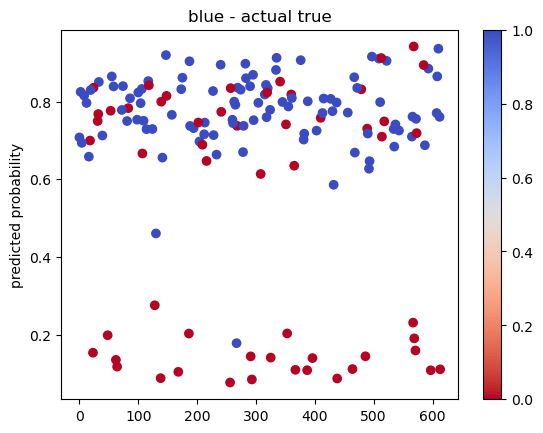

In [131]:
plt.scatter(pred_prob.index, pred_prob[1], c=y_test.values, cmap='coolwarm_r')
plt.colorbar()
plt.ylabel('predicted probability')
plt.title('blue - actual true')

In [132]:
probabilities = pd.DataFrame({'prob':pred_prob[1], 'actual':y_test}).sort_values(['prob'], ascending=False)

Text(0.5, 1.0, 'blue - actual true')

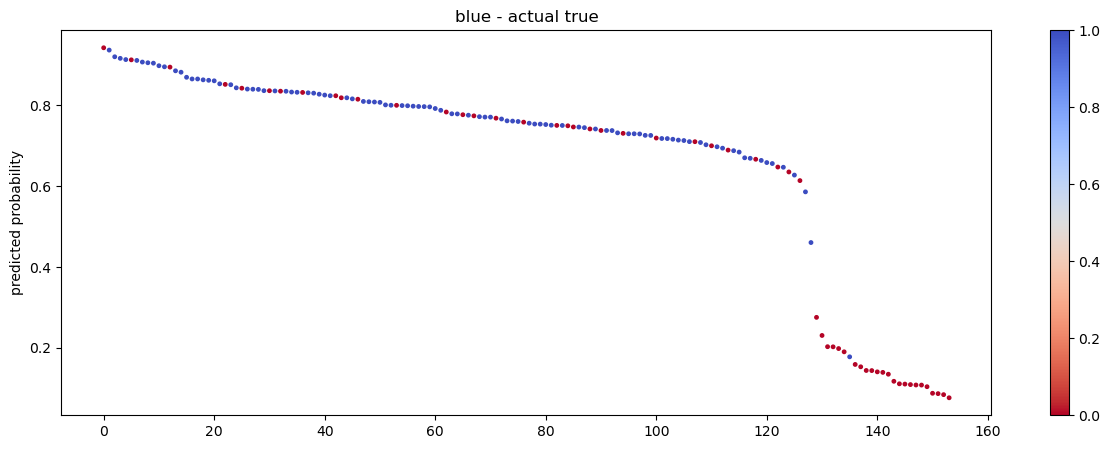

In [133]:
plt.figure(figsize=(15,5))
plt.scatter(range(len(probabilities)), probabilities['prob'], c=probabilities['actual'], s=6, cmap='coolwarm_r')
plt.colorbar()
plt.clim(0,1)
plt.ylabel('predicted probability')
plt.title('blue - actual true')

In [134]:
coeff = pd.DataFrame({'columns':X_train.columns, 'coef':(lr.coef_[0])})
coeff.sort_values(by='coef', ascending=False)

,columns,coef
8,Credit_History_1.0,3.143816
5,Married_Yes,0.375881
1,CoapplicantIncome,0.246716
0,ApplicantIncome,0.221218
9,Dependents,0.051324
7,Self_Employed_Yes,0.005536
10,Property_Area,-0.092063
3,Loan_Amount_Term,-0.106991
4,Gender_Male,-0.193419
2,LoanAmount,-0.379525


In [106]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [107]:
from statsmodels.tools.tools import add_constant

In [114]:
xx = add_constant(X_train)

In [135]:
pd.DataFrame({'feature': X_train.columns, 'vif':[variance_inflation_factor(X_train, i) for i in range(X_train.shape[1])]})

,feature,vif
0,ApplicantIncome,1.947524
1,CoapplicantIncome,1.566522
2,LoanAmount,1.665749
3,Loan_Amount_Term,1.047736
4,Gender_Male,5.204088
5,Married_Yes,3.820495
6,Education_Not Graduate,1.349408
7,Self_Employed_Yes,1.197188
8,Credit_History_1.0,4.175620
9,Dependents,1.813027


In [136]:
pd.DataFrame({'feature': X_train.columns, 'vif': np.linalg.inv(X_train.corr()).diagonal()}).sort_values(by='vif', ascending=True)

,feature,vif
10,Property_Area,1.021833
8,Credit_History_1.0,1.029484
7,Self_Employed_Yes,1.046664
3,Loan_Amount_Term,1.055709
6,Education_Not Graduate,1.092041
9,Dependents,1.186322
4,Gender_Male,1.193678
5,Married_Yes,1.318813
1,CoapplicantIncome,1.607963
2,LoanAmount,1.669701


# test data

In [250]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    float64
 7   CoapplicantIncome  367 non-null    float64
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
 12  Coapplicant        367 non-null    int64  
 13  Combined_Income    367 non-null    float64
 14  EMI                356 non-null    float64
dtypes: float64(7), int64(1), object(7)
memory usage: 43.1+ KB


In [251]:
Loan_ID = test['Loan_ID']

In [252]:
test.drop(columns=['Loan_ID'], inplace=True)

In [225]:
test_new.drop(columns=['Loan_ID'], inplace=True)

In [253]:
test.isna().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
Coapplicant           0
Combined_Income       0
EMI                  11
dtype: int64

In [254]:
test.isna().mean()

Gender               0.029973
Married              0.000000
Dependents           0.027248
Education            0.000000
Self_Employed        0.062670
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.013624
Loan_Amount_Term     0.016349
Credit_History       0.079019
Property_Area        0.000000
Coapplicant          0.000000
Combined_Income      0.000000
EMI                  0.029973
dtype: float64

In [262]:
test['Loan_Amount_Term'].value_counts()

360.0    1
12.0     1
Name: Loan_Amount_Term, dtype: int64

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

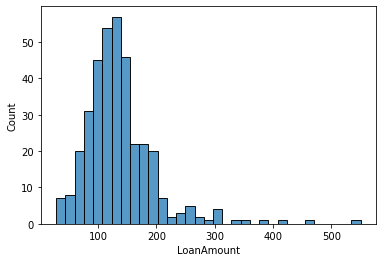

In [263]:
sns.histplot(test['LoanAmount'])

In [255]:
imputer.fit(train)

ColumnTransformer(transformers=[('cont', SimpleImputer(strategy='median'),
                                 ['ApplicantIncome', 'CoapplicantIncome',
                                  'LoanAmount', 'Loan_Amount_Term', 'EMI']),
                                ('cat', SimpleImputer(strategy='most_frequent'),
                                 ['Gender', 'Married', 'Education',
                                  'Self_Employed', 'Credit_History',
                                  'Dependents', 'Property_Area'])])

In [261]:
train = pd.DataFrame(imputer.transform(train), columns=imputer_columns)

In [262]:
test = pd.DataFrame(imputer.transform(test), columns=imputer_columns)

In [263]:
scaling.fit(train)

ColumnTransformer(transformers=[('scale', StandardScaler(),
                                 ['ApplicantIncome', 'CoapplicantIncome',
                                  'LoanAmount', 'Loan_Amount_Term', 'EMI']),
                                ('ohe', OneHotEncoder(),
                                 ['Gender', 'Married', 'Education',
                                  'Self_Employed', 'Credit_History']),
                                ('ord',
                                 OrdinalEncoder(categories=[['0', '1', '2',
                                                             '3+'],
                                                            ['Rural',
                                                             'Semiurban',
                                                             'Urban']]),
                                 ['Dependents', 'Property_Area'])])

In [264]:
train = pd.DataFrame(scaling.transform(train), columns=scaling_columns)

In [265]:
test = pd.DataFrame(scaling.transform(test), columns=scaling_columns)

In [272]:
labels = pd.read_csv('train.csv')['Loan_Status'].apply(lambda x : 1 if x=='Y' else 0)

In [273]:
vote.fit(train, labels)

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                             ('rf',
                              RandomForestClassifier(max_depth=4,
                                                     min_samples_split=6,
                                                     n_estimators=275)),
                             ('svc',
                              SVC(C=0.936, gamma=0.026, probability=True)),
                             ('gb',
                              GradientBoostingClassifier(learning_rate=0.007,
                                                         max_depth=5,
                                                         min_samples_split=7,
                                                         n_estimators=157))])

In [274]:
pred = vote.predict(test)

In [275]:
pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [276]:
result = pd.DataFrame(pred, Loan_ID).reset_index()
result.columns=['Loan_ID', 'Loan_Status']
result

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,1
365,LP002986,1


In [277]:
result['Loan_Status'] = result['Loan_Status'].apply(lambda x : 'Y' if x == 1 else 'N')

In [280]:
result.to_csv(r'D:\projects\AV\Loan prediction\submission.csv', index=False)